<h1 style="color:orange;">Assignment-4</h1>

<h2 style='color:skyblue;'>Performing Train Test Split and writing to csv</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("abalone.csv")

In [3]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=42)

In [5]:
X_train.shape

(2923, 7)

In [6]:
df1=pd.DataFrame(X_train,columns=X_train.columns)
df1['Rings']=Y_train
df2=pd.DataFrame(X_test,columns=X_test.columns)
df2['Rings']=Y_test

### Writing to CSV

In [7]:
df1.to_csv("abalone_train.csv")
df2.to_csv("abalone_test.csv")

<h2 style='color:skyblue;'>Creating Pearson Correlation Coefficient</h2>

<img src='correlation_coefficient_formula.svg' width="400" height="500">

In [8]:
def mean_(arr):
    return np.sum(arr)/len(arr)

In [9]:
def pearson_correlation(att1,att2):
    
    num= np.sum((att1 - mean_(att1))*(att2 - mean_(att2)))
    den=(np.sum((att1 - mean_(att1))**2)*np.sum((att2 - mean_(att2))**2))**0.5
    return num/den

### Creating Custom Correlation Matrix for Better View

In [10]:
def custom_corr_matrix(dataframe):
    columns = dataframe.columns
    n = len(columns)
    corr_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            corr_matrix[i, j] = pearson_correlation(dataframe[columns[i]], dataframe[columns[j]])

    return pd.DataFrame(corr_matrix, index=columns, columns=columns)

In [11]:
custom_corr_matrix(df)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [12]:
print(f"The Highest Correlation is with Shell Weight : {pearson_correlation(df['Shell weight'],df['Rings'])}")

The Highest Correlation is with Shell Weight : 0.6275740445103217


<h2 style='color:skyblue;'>Constructing a Simple Linear Regression using OOPS</h2>

In [13]:
class SimpleLR:
    def __init__(self):
        self.m= None
        self.c= None
    def fit(self,X_train,Y_train):
        X_mean=mean_(X_train)
        Y_mean=mean_(Y_train)
        num=np.dot((X_train-X_mean),(Y_train-Y_mean))
        den=np.sum((X_train-X_mean)**2)
        m_= num/den
        self.m=m_
        self.c=(Y_mean - (self.m*X_mean))
    def predict(self,X_test):
        return self.m*X_test + self.c

<h2 style='color:skyblue;'>Fitting model on Shell Weight and Rings and Plotting Best Fit Line</h2>

In [14]:
lr=SimpleLR()
lr.fit(X_train['Shell weight'],Y_train)

In [15]:
y_pred_train=lr.predict(X_train['Shell weight'])

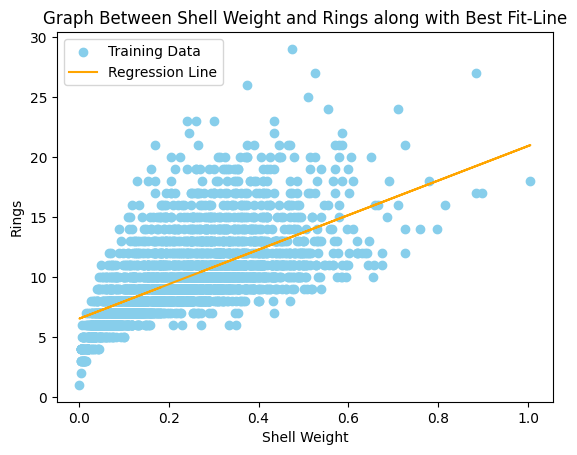

In [16]:
plt.scatter(X_train['Shell weight'],Y_train,color='skyblue',label='Training Data')
plt.plot(X_train['Shell weight'],y_pred_train,color='orange', label='Regression Line')
plt.xlabel('Shell Weight')
plt.ylabel('Rings')
plt.legend()
plt.title('Graph Between Shell Weight and Rings along with Best Fit-Line')
plt.show()

### Creating Function For Computing Root Mean Square Error

In [17]:
def rmse(y_true,y_pred):
    return (np.sum((y_true - y_pred)**2)/len(y_true))**0.5

In [18]:
print(f"The RMSE of Training Data and Its Prediction is {rmse(Y_train,y_pred_train)}")

The RMSE of Training Data and Its Prediction is 2.527846339134725


### Now predicting for Testing Data and Computing RMSE

In [19]:
lr1=SimpleLR()
lr1.fit(X_train['Shell weight'],Y_train)
y_pred_test=lr.predict(X_test['Shell weight'])


In [20]:
print(f"The RMSE of Testing Data and Its Prediction is {rmse(Y_test,y_pred_test)}")

The RMSE of Testing Data and Its Prediction is 2.467940147010543


<h2 style='color:orange;'>Plotting Scatterplot Between Actual Rings and Predicted Rings</h2>

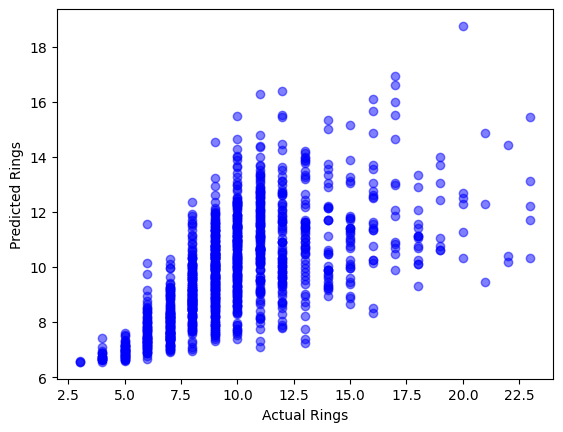

In [21]:
plt.scatter(Y_test,y_pred_test,alpha=0.5,c='blue')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.show()

<h1 style="color:orange;">Polynomial Regression</h1>

### Finding the coefficient of X for degree D

In [22]:
def X_trf(X_train,degree):
    x_trf= np.array(X_train).reshape(1,len(X_train))
    for i in range(2,degree+1):
        x_trf=np.insert(x_trf,x_trf.shape[0],pow(x_trf[0,:],i),axis=0)
    return x_trf.T

In [23]:
x_trf= np.array(X_train['Shell weight']).reshape(1,len(X_train))
x_trf

array([[0.1815, 0.105 , 0.145 , ..., 0.188 , 0.235 , 0.271 ]])

In [24]:
x_trf1=np.insert(x_trf,x_trf.shape[0],pow(x_trf[0,:],4),axis=0)
x_trf1.T

array([[1.81500000e-01, 1.08519184e-03],
       [1.05000000e-01, 1.21550625e-04],
       [1.45000000e-01, 4.42050625e-04],
       ...,
       [1.88000000e-01, 1.24919834e-03],
       [2.35000000e-01, 3.04980062e-03],
       [2.71000000e-01, 5.39358048e-03]])

### Creating Polynomial Regression from Scratch using OOPS

In [25]:
class Polynomial_reg:
    def __init__(self,degree):
        self.m= np.ones(degree+1)
        self.degree=degree
    def fit(self,X_train,Y_train):
        x_trf= X_trf(X_train,self.degree)
        x_trf= np.insert(x_trf,0,1,axis=1)
        self.m = np.linalg.inv(np.dot(x_trf.T,x_trf)).dot(x_trf.T).dot(Y_train)
    def predict(self,X_test):
        x_trf1= X_trf(X_test,self.degree)
        x_trf1= np.insert(x_trf1,0,1,axis=1)
        return np.dot(x_trf1,self.m)

### Prediction accuracy for different values of degree [2,3,4,5] on Train Data

In [26]:
rmse_training_data={}
for i in range(2,6):
    pr=Polynomial_reg(i)
    pr.fit(X_train['Shell weight'],Y_train)
    y_pred=pr.predict(X_train['Shell weight'])
    rmse_training_data[i]=rmse(Y_train,y_pred)

In [27]:
pd.DataFrame(list(rmse_training_data.items()), columns=['Degree','RMSE'])

,Degree,RMSE
0,2,2.499297
1,3,2.475669
2,4,2.467195
3,5,2.465950


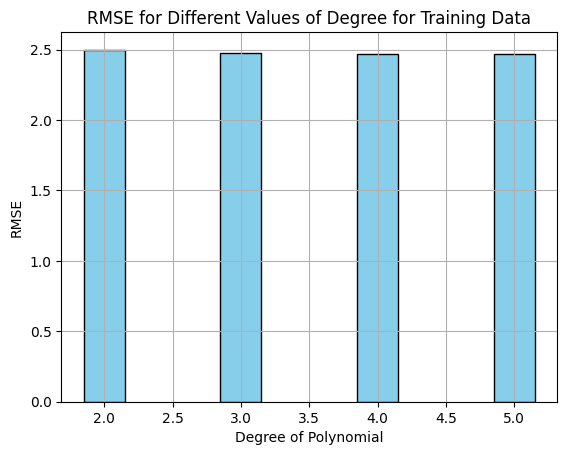

In [28]:
plt.bar(rmse_training_data.keys(),rmse_training_data.values(),color='skyblue',width=0.3,edgecolor='black')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('RMSE for Different Values of Degree for Training Data')
plt.grid()

### Prediction accuracy for different values of degree [2,3,4,5] on Testing Data

In [29]:
rmse_testing_data={}
for i in range(2,6):
    pr=Polynomial_reg(i)
    pr.fit(X_train['Shell weight'],Y_train)
    y_pred=pr.predict(X_test['Shell weight'])
    rmse_testing_data[i]=rmse(Y_test,y_pred)

In [30]:
pd.DataFrame(list(rmse_testing_data.items()), columns=['Degree','RMSE'])

,Degree,RMSE
0,2,2.433761
1,3,2.410622
2,4,2.408325
3,5,2.409544


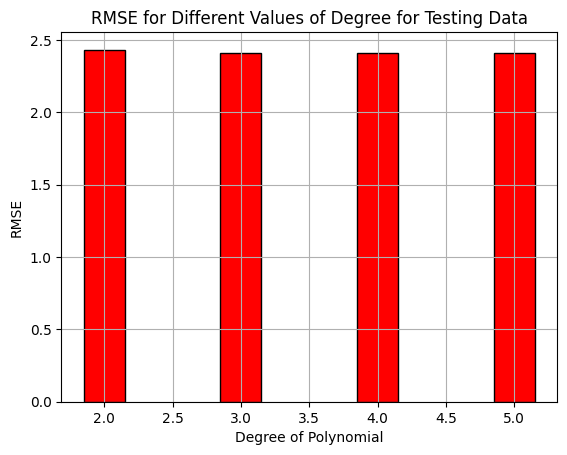

In [31]:
plt.bar(rmse_testing_data.keys(),rmse_testing_data.values(),color='red',width=0.3,edgecolor='black')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('RMSE for Different Values of Degree for Testing Data')
plt.grid()
plt.show()

### Plotting the Graph for Different Degrees

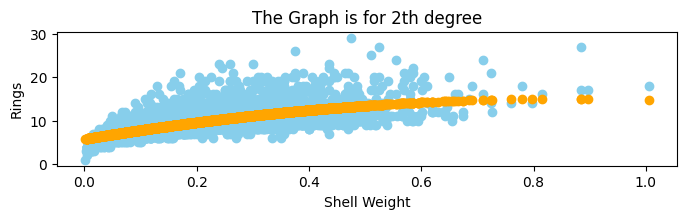

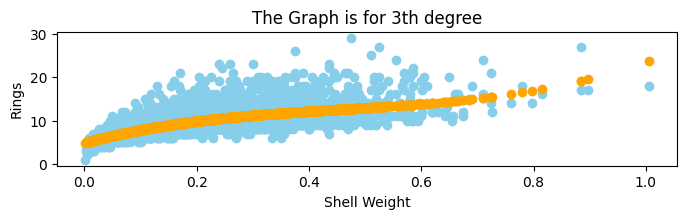

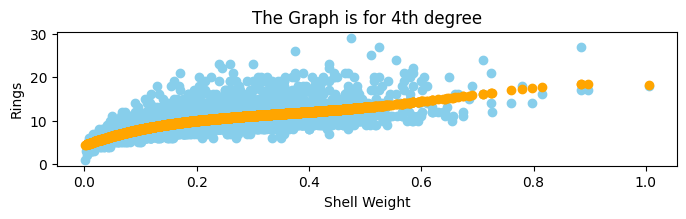

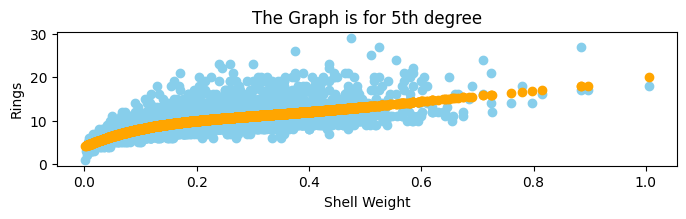

In [32]:
for i in range(2,6):
    pr=Polynomial_reg(i)
    pr.fit(X_train['Shell weight'],Y_train)
    plt.figure(figsize=(8,8))
    plt.subplot(4,1,i-1)
    plt.scatter(X_train['Shell weight'],Y_train,color='skyblue')
    plt.scatter(X_train['Shell weight'],pr.predict(X_train['Shell weight']),color='orange')
    plt.xlabel('Shell Weight')
    plt.ylabel('Rings')
    plt.title(f'The Graph is for {i}th degree')
    

### Plotting the Graph for Lowest RMSE on Training Data

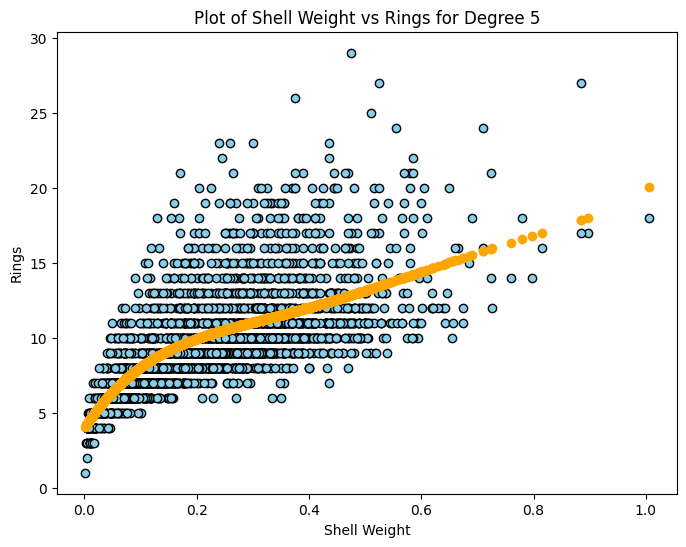

In [33]:
plt.figure(figsize=(8,6))
pr=Polynomial_reg(5)
pr.fit(X_train['Shell weight'],Y_train)
plt.scatter(X_train['Shell weight'],Y_train,color='skyblue',edgecolor='black')
plt.scatter(X_train['Shell weight'],pr.predict(X_train['Shell weight']),color='orange')
plt.title("Plot of Shell Weight vs Rings for Degree 5")
plt.xlabel('Shell Weight')
plt.ylabel('Rings')
plt.show()